In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder = LabelEncoder()

In [6]:
df['Species'] = encoder.fit_transform(df['Species'])

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [8]:
df = df[df['Species'] != 0] [['SepalWidthCm','PetalLengthCm','Species']]

In [9]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

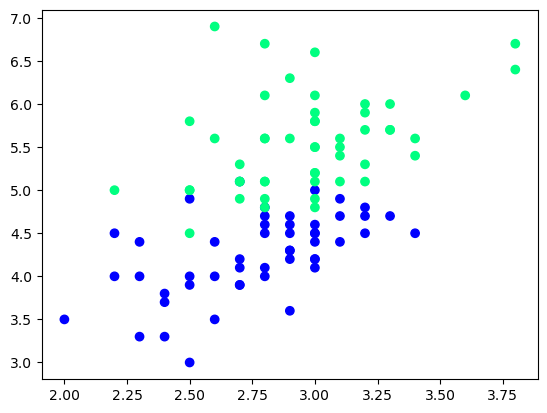

In [11]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [12]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
100,3.3,6.0,2
95,3.0,4.2,1
62,2.2,4.0,1
96,2.9,4.2,1
90,2.6,4.4,1
60,2.0,3.5,1
85,3.4,4.5,1
82,2.7,3.9,1
92,2.6,4.0,1
99,2.8,4.1,1


In [13]:
#taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [14]:
df_train

,SepalWidthCm,PetalLengthCm,Species
100,3.3,6.0,2
142,2.7,5.1,2
78,2.9,4.5,1
70,3.2,4.8,1
119,2.2,5.0,2
107,2.9,6.3,2
60,2.0,3.5,1
121,2.8,4.9,2
59,2.7,3.9,1
82,2.7,3.9,1


In [15]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [16]:
y_test

array([2, 2, 1, 2, 1])

In [17]:
#case 1 bagging 

In [18]:
#data for treee 1
df_bag = df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]
df_bag

,SepalWidthCm,PetalLengthCm,Species
100,3.3,6.0,2
78,2.9,4.5,1
70,3.2,4.8,1
142,2.7,5.1,2
100,3.3,6.0,2
119,2.2,5.0,2
107,2.9,6.3,2
78,2.9,4.5,1


In [ ]:
!pip install mlxtend

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [27]:
dt_bag1 =DecisionTreeClassifier()

In [25]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test, y_pred))

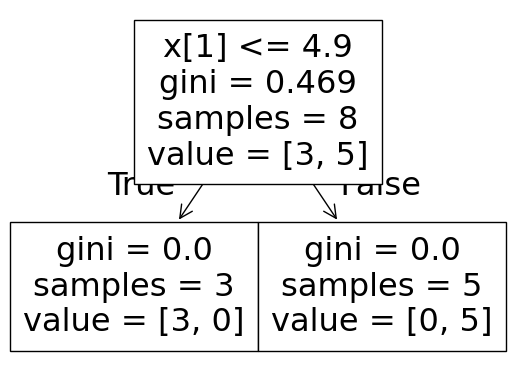

F:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
F:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


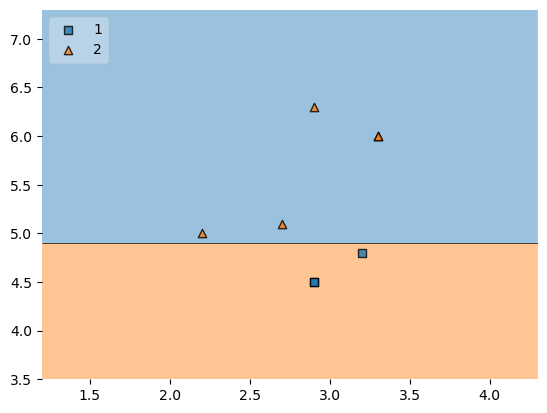

In [28]:
evaluate(dt_bag1,X,y)

In [29]:
#data for tree 1 
df_bag = df_train.sample(8,replace=True)

#fetch X and y 
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

#print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
119,2.2,5.0,2
121,2.8,4.9,2
59,2.7,3.9,1
121,2.8,4.9,2
82,2.7,3.9,1
107,2.9,6.3,2
121,2.8,4.9,2
121,2.8,4.9,2


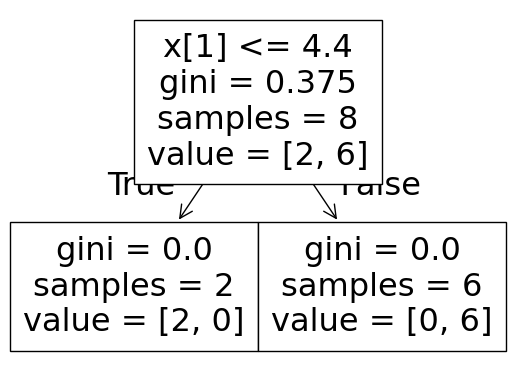

F:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
F:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


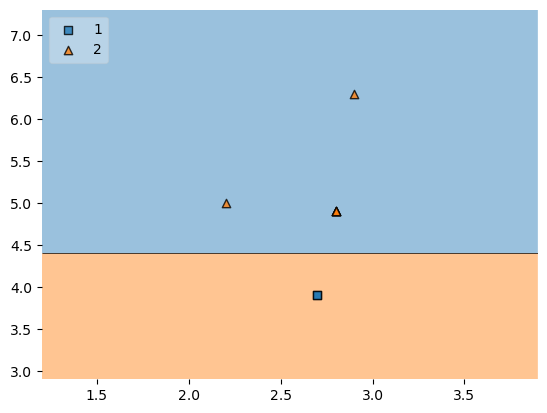

In [30]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [31]:
df_bag = df_train.sample(8,replace=True)

#fetch x and y 
X =df_bag.iloc[:,0:2]
y =df_bag.iloc[:,-1]
#print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
82,2.7,3.9,1
100,3.3,6.0,2
70,3.2,4.8,1
82,2.7,3.9,1
107,2.9,6.3,2
82,2.7,3.9,1
121,2.8,4.9,2
59,2.7,3.9,1


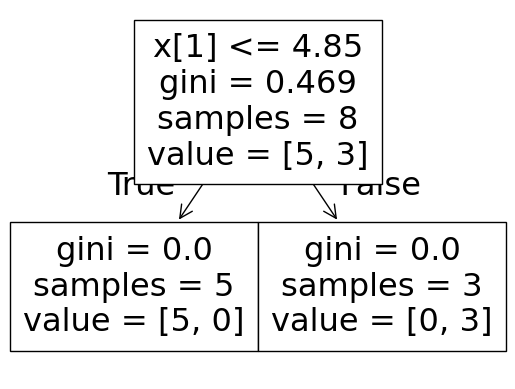

F:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
F:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


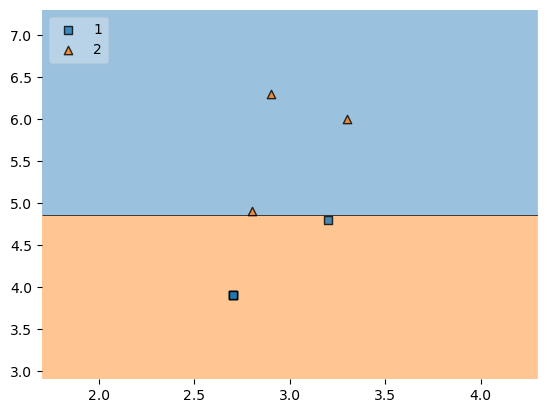

In [32]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [33]:
#predict

In [34]:
df_test

,SepalWidthCm,PetalLengthCm,Species
57,2.4,3.3,1
90,2.6,4.4,1
71,2.8,4.0,1
58,2.9,4.6,1
146,2.5,5.0,2


In [35]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))


Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


F:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
F:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
F:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [36]:
#pasting #raw sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
100,3.3,6.0,2
142,2.7,5.1,2
78,2.9,4.5,1
70,3.2,4.8,1
119,2.2,5.0,2
107,2.9,6.3,2
60,2.0,3.5,1
121,2.8,4.9,2
59,2.7,3.9,1
82,2.7,3.9,1


In [37]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
121,2.8,4.9,2
78,2.9,4.5,1
59,2.7,3.9,1
119,2.2,5.0,2
70,3.2,4.8,1
100,3.3,6.0,2
107,2.9,6.3,2
142,2.7,5.1,2
